In [98]:
import wave
import numpy as np
import librosa.display
import matplotlib.pyplot as plt

In [46]:
w = wave.open('C:/Users/John Justine/Downloads/1272-128104-0012.wav','r')
print("Parameters: ", w.getparams())

Parameters:  _wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=86080, comptype='NONE', compname='not compressed')


Sample frequency, this denotes the number of samples per second

In [145]:
sample_freq = w.getframerate()
sample_freq

16000

Number of Samples, denotes the total number of samples or frames in the audio file

In [143]:
n_samples = w.getnframes()
n_samples

86080

Signal Wave, this is the wave amplitude which is the sound intensity

In [144]:
signal_wave = w.readframes(-1)
signal_wave

b''

Audio length, duaration of the audio

In [53]:
duration = n_samples/sample_freq

### Creating numpy objects

Creating a numpy object from the signal wave

In [55]:
signal_array = np.frombuffer(signal_wave,dtype = np.int16)

Creating a numpy object from duration.

In [132]:
time = np.linspace(0, duration, num=n_samples)

### 1.a Time domain representation of the original speech signal

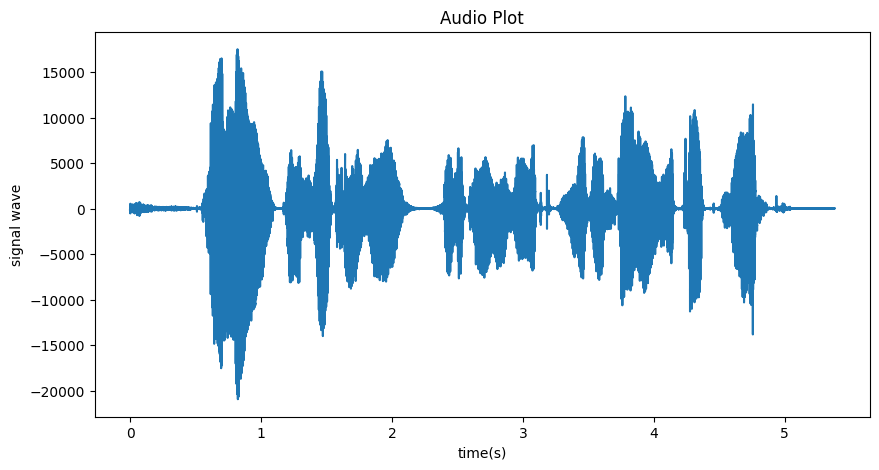

In [63]:
plt.figure(figsize=(10,5))
plt.plot(time, signal_array)
plt.title('Audio Plot')
plt.ylabel('signal wave')
plt.xlabel('time(s)')
# plt.xlim(0,time) #limiting  the x axis to the audio time
plt.show()

In [66]:
!pip install librosa


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\John Justine\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Sampling at different Rates 8k, 16k(default), 44.1k

In [67]:
import librosa

In [106]:
audiofile = 'C:/Users/John Justine/Downloads/1272-128104-0012.wav'
# audio time series as a numpy array with a default sampling of 16kHz
def_samp=librosa.load(audiofile,sr=None)
# 8kHz
samp_8k=librosa.load(audiofile,sr=8000)
# 44kHz
samp_441k=librosa.load(audiofile,sr=44100)

In [127]:
samp_8k

(array([-4.47169505e-03, -3.68396495e-03, -2.49315694e-04, ...,
        -2.19181413e-04,  3.03817797e-05,  1.00285084e-04], dtype=float32),
 8000)

### Plotting the audio array using different samples

#### 16kHz

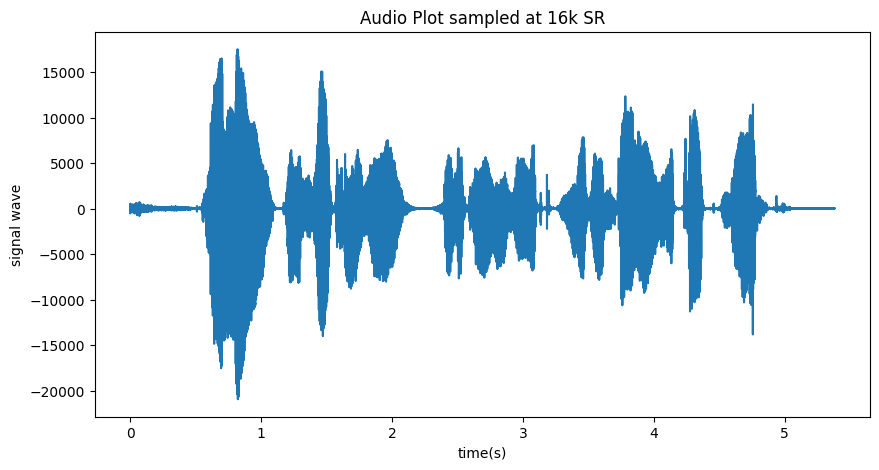

In [108]:
plt.figure(figsize=(10,5))
plt.plot(time, signal_array)
plt.title('Audio Plot sampled at 16k SR')
plt.ylabel('signal wave')
plt.xlabel('time(s)')
# plt.xlim(0,time) #limiting  the x axis to the audio time
plt.show()

#### 8kHz

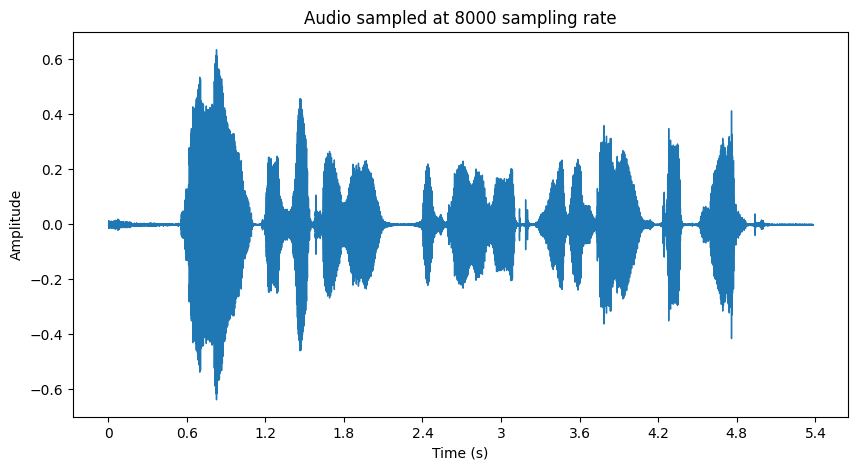

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display as ld
plt.figure(figsize=(10,5))
ld.waveshow(samp_8k[0], sr=8000)
plt.title('Audio sampled at 8000 sampling rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

#### 44.1kHz

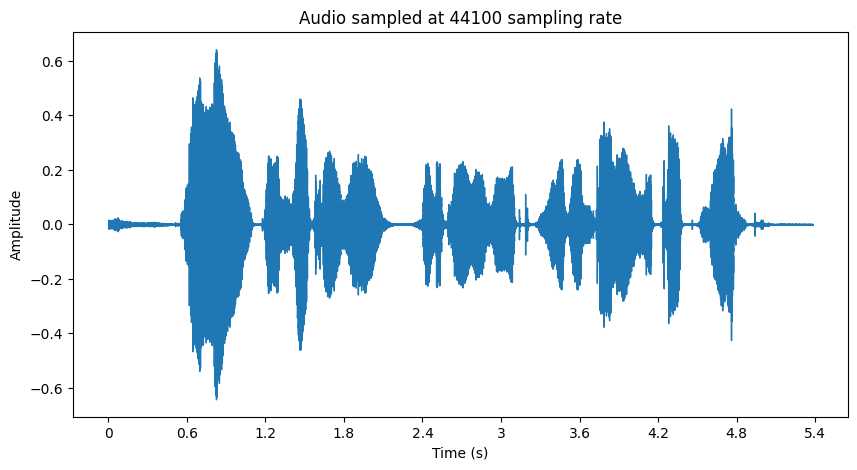

In [111]:
plt.figure(figsize=(10,5))
ld.waveshow(samp_441k[0], sr=44100)
plt.title('Audio sampled at 44100 sampling rate')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Sampling and Reconstruction (ZOH & Linear Interpolation)
#### Zero Order Hold

The nearest neighbour interpolation (NNI) is a very simple interpolation approach. Recall that interpolation seeks for a given sample of observations {z1,z2,.....zn} at locations {x1,x2.......,xn} to estimate the value of z at some new point x.

NNI uses te value zi that is closest to x. Thus the algorithm seeks to find i such that |xi-x| is minimized, then the estimate of z is zi.



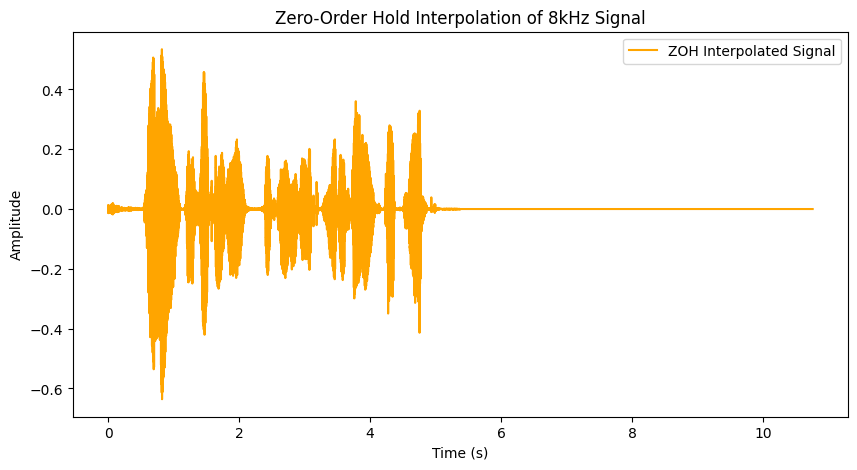

In [197]:
from scipy import interpolate

# Define the parameters for ZOH
duration_8k = n_samples / 8000  # Duration for 8kHz
time_8k = np.linspace(0, duration_8k, num=len(samp_8k[0]))

# Create time vector for the new signal (higher sample rate)
new_sample_rate = 44100
new_time_8k = np.linspace(0, duration_8k, num=int(duration_8k * new_sample_rate))

# Zero-Order Hold Interpolation
zoh_interpolated = np.zeros_like(new_time_8k)

for i in range(len(new_time_8k)):
    # Find the index of the nearest original sample
    index = int(np.floor(new_time_8k[i] * 8000))  # 8000 is original sample rate
    if index >= len(samp_8k[0]):
        index = len(samp_8k[0]) - 1  # Ensure index is within bounds
    zoh_interpolated[i] = samp_8k[0][index]

# Plotting the ZOH Interpolation
plt.figure(figsize=(10, 5))
plt.plot(new_time_8k, zoh_interpolated, label='ZOH Interpolated Signal', color='orange')
plt.title('Zero-Order Hold Interpolation of 8kHz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

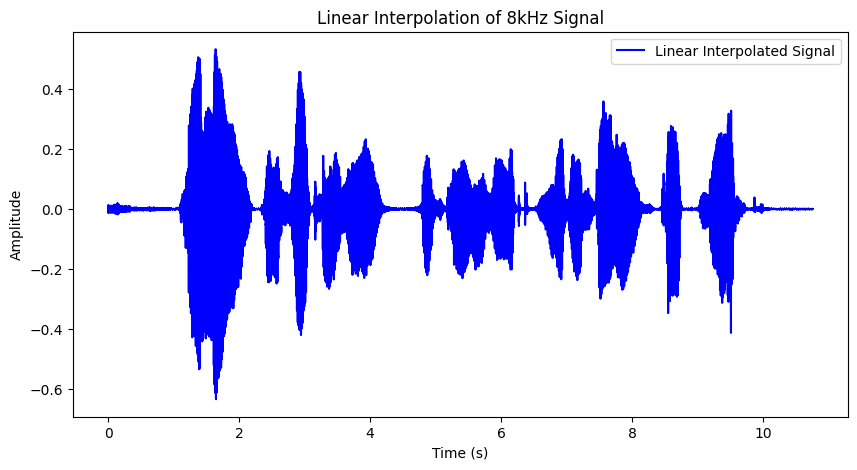

In [192]:
# Linear Interpolation
linear_interp_func = interpolate.interp1d(time_8k, samp_8k[0], kind='linear', fill_value="extrapolate")
linear_interpolated = linear_interp_func(new_time_8k)

# Plotting the Linear Interpolation
plt.figure(figsize=(10, 5))
plt.plot(new_time_8k, linear_interpolated, label='Linear Interpolated Signal', color='blue')
plt.title('Linear Interpolation of 8kHz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


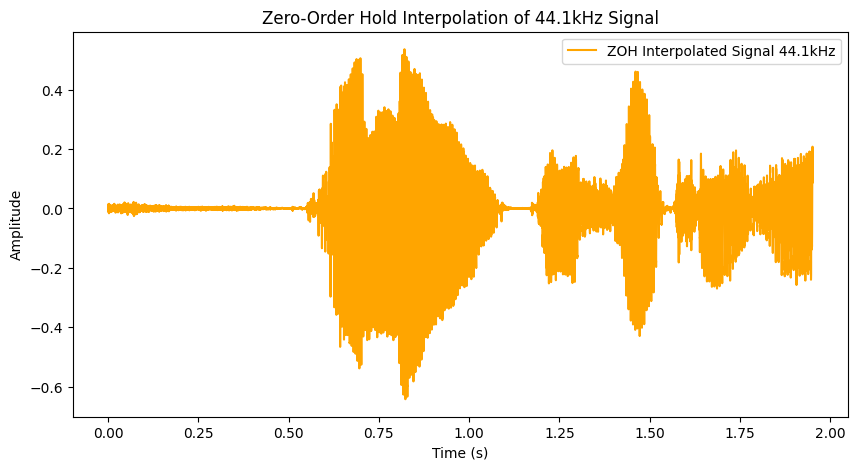

In [193]:
# Define the parameters for ZOH with 44.1kHz
duration_441k = n_samples / 44100
time_441k = np.linspace(0, duration_441k, num=len(samp_441k[0]))

new_time_441k = np.linspace(0, duration_441k, num=int(duration_441k * new_sample_rate))

zoh_interpolated_441k = np.zeros_like(new_time_441k)

for i in range(len(new_time_441k)):
    index = int(np.floor(new_time_441k[i] * 44100))  # 44100 is original sample rate
    if index >= len(samp_441k[0]):
        index = len(samp_441k[0]) - 1
    zoh_interpolated_441k[i] = samp_441k[0][index]

# Plotting the ZOH Interpolation for 44.1kHz
plt.figure(figsize=(10, 5))
plt.plot(new_time_441k, zoh_interpolated_441k, label='ZOH Interpolated Signal 44.1kHz', color='orange')
plt.title('Zero-Order Hold Interpolation of 44.1kHz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


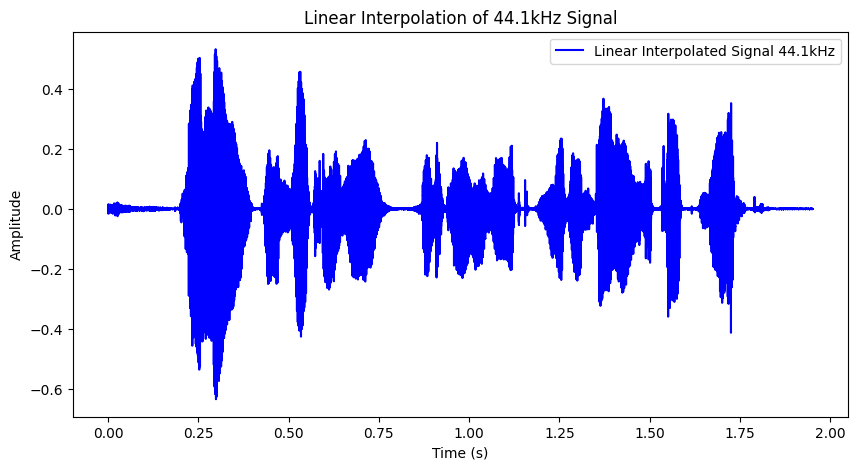

In [194]:
# Linear Interpolation for 44.1kHz
linear_interp_func_441k = interpolate.interp1d(time_441k, samp_441k[0], kind='linear', fill_value="extrapolate")
linear_interpolated_441k = linear_interp_func_441k(new_time_441k)

# Plotting the Linear Interpolation for 44.1kHz
plt.figure(figsize=(10, 5))
plt.plot(new_time_441k, linear_interpolated_441k, label='Linear Interpolated Signal 44.1kHz', color='blue')
plt.title('Linear Interpolation of 44.1kHz Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


Mean Squared Error for the reconstructed signals

In [199]:
def mean_squared_error(original, reconstructed):
    return np.mean((original - reconstructed) ** 2)


In [201]:
# Truncate the reconstructed signal to the length of the original
zoh_interpolated_truncated = zoh_interpolated[:len(samp_8k[0])]

# Calculate MSE for ZOH
mse_zoh_8k = mean_squared_error(samp_8k[0], zoh_interpolated_truncated)
print(f'Mean Squared Error (ZOH, 8kHz): {mse_zoh_8k}')


Mean Squared Error (ZOH, 8kHz): 0.026665614851536734


In [202]:
# Interpolate the original signal to match the length of the reconstructed signal
original_time_8k = np.linspace(0, duration_8k, num=len(samp_8k[0]))
interpolate_original = interpolate.interp1d(original_time_8k, samp_8k[0], kind='linear', fill_value="extrapolate")
original_interpolated = interpolate_original(new_time_8k)

# Calculate MSE for ZOH
mse_zoh_8k = mean_squared_error(original_interpolated, zoh_interpolated)
print(f'Mean Squared Error (ZOH, 8kHz): {mse_zoh_8k}')


Mean Squared Error (ZOH, 8kHz): 0.011738538293513963


In [203]:
# Use the same interpolated original signal
mse_linear_8k = mean_squared_error(original_interpolated, linear_interpolated)
print(f'Mean Squared Error (Linear, 8kHz): {mse_linear_8k}')


Mean Squared Error (Linear, 8kHz): 0.0


### Inference

In this section, I learned how to extract key parameters from an audio file, such as sample frequency and waveform amplitude. By visualizing audio signals in the time domain, I gained insights into waveform characteristics and how they evolve over time. Exploring different sampling rates (8kHz, 16kHz, and 44.1kHz) helped me understand how these rates affect audio fidelity and detail.

I implemented two interpolation techniques: Zero-Order Hold (ZOH) and Linear Interpolation, observing the differences in smoothness between the two methods. To quantitatively assess reconstruction accuracy, I used Mean Squared Error (MSE), which provided a clear metric for evaluating performance.

The MSE which 0.02 (8kHz) and 0.01 (44.1kHz) and 0 (Linear 8kHz) tells us that we were successfully able to reconstruct the audio without much loss or error.

### PART II

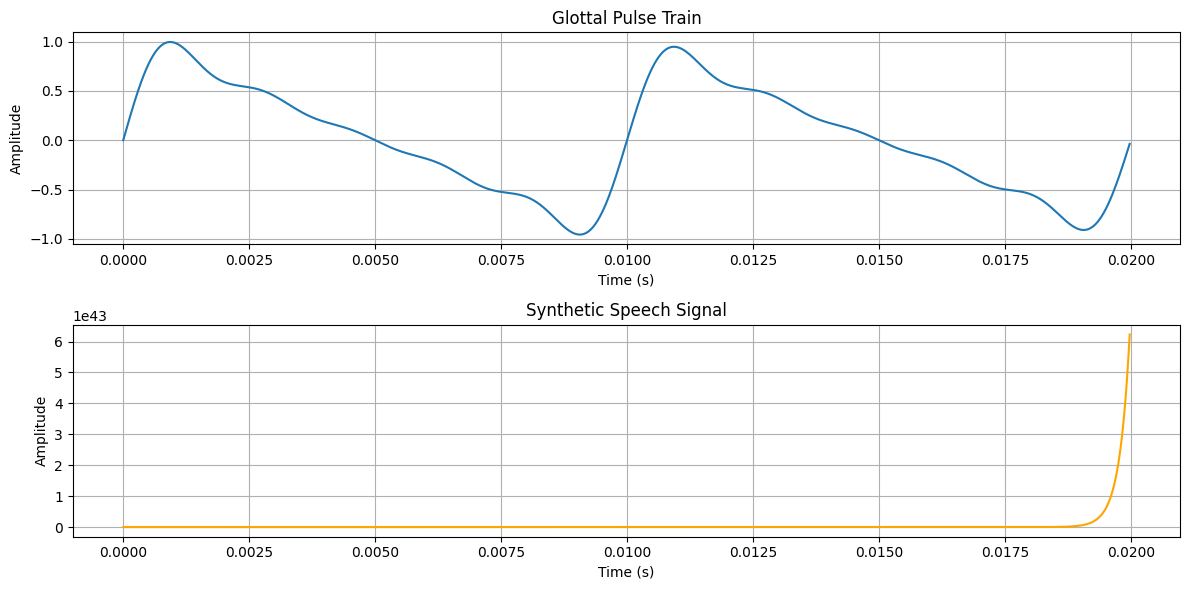

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Parameters
fs = 44100  # Original sampling frequency
duration = 1.0  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# (a)(i) Create a source signal (glottal pulse train for voiced sounds)
f0 = 100  # Fundamental frequency (Hz)
num_harmonics = 5
harmonic_strengths = [1, 0.5, 0.3, 0.2, 0.1]

# Generate glottal pulse
glottal_pulse = np.zeros_like(t)
for i in range(num_harmonics):
    glottal_pulse += harmonic_strengths[i] * np.sin(2 * np.pi * f0 * (i + 1) * t)
glottal_pulse = glottal_pulse / np.max(np.abs(glottal_pulse))  # Normalize

# Apply an exponential envelope
envelope = np.exp(-5 * t)
glottal_pulse *= envelope

# (a)(ii) Apply a filter to model the vocal tract (all-pole filter)
formant_freqs = [730, 1090]  # Formant frequencies (Hz)
poles = np.zeros(len(formant_freqs), dtype=complex)
for i, f in enumerate(formant_freqs):
    poles[i] = np.exp(2j * np.pi * f / fs)

# Generate the filter coefficients (A coefficients)
a_coeffs = np.poly(poles).real.astype(np.float64)
b_coeffs = np.array([1], dtype=np.float64)

# Apply the filter to the glottal pulse
speech_signal = lfilter(b_coeffs, a_coeffs, glottal_pulse)

# (b) Plot the generated speech signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t[:int(0.02 * fs)], glottal_pulse[:int(0.02 * fs)], label='Glottal Pulse Train')
plt.title('Glottal Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(t[:int(0.02 * fs)], speech_signal[:int(0.02 * fs)], label='Synthetic Speech Signal', color='orange')
plt.title('Synthetic Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()


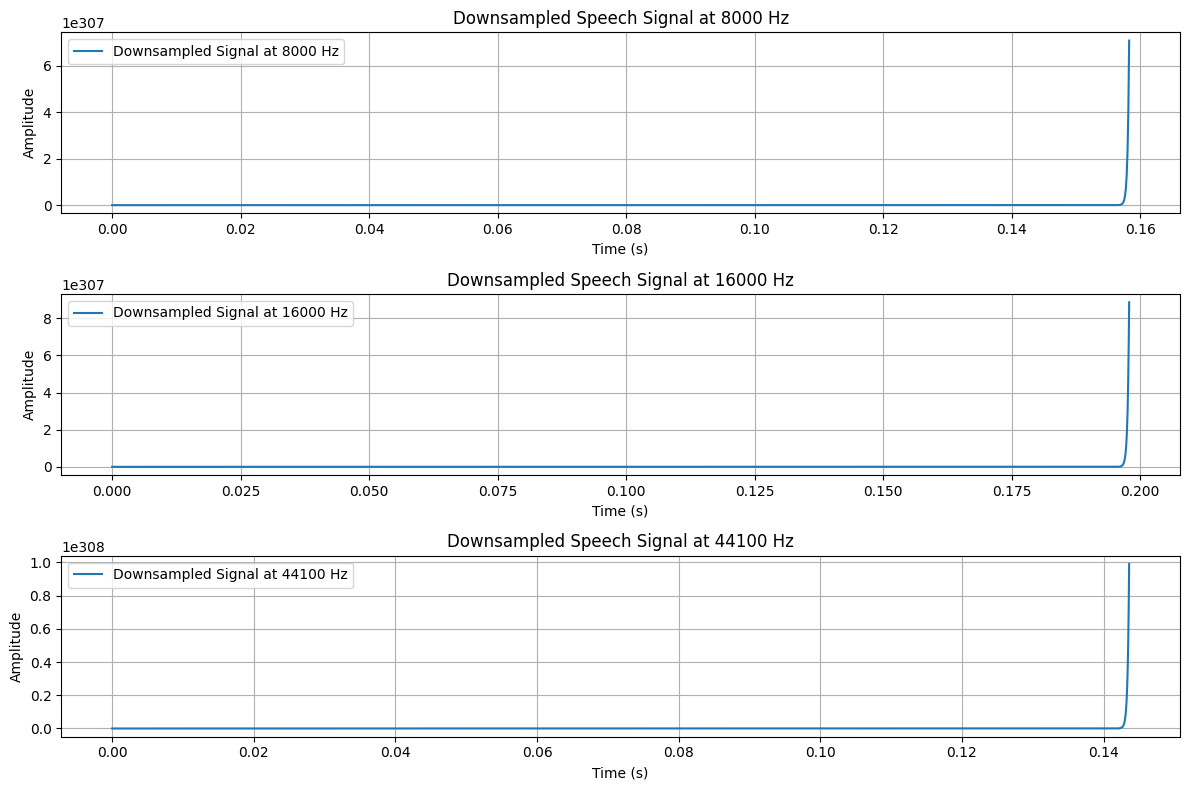

In [258]:
# (c) Sampling rates
sampling_rates = [8000, 16000, 44100]  # Hz
downsampled_signals = {}
downsampled_times = {}

# Downsample the speech signal
for sr in sampling_rates:
    factor = fs // sr
    downsampled_signal = speech_signal[::factor]
    downsampled_signals[sr] = downsampled_signal
    
    # Generate new time vector for downsampled signal
    new_duration = len(downsampled_signal) / sr
    downsampled_time = np.linspace(0, new_duration, len(downsampled_signal), endpoint=False)
    downsampled_times[sr] = downsampled_time

# Plot the downsampled signals
plt.figure(figsize=(12, 8))
for i, sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.plot(downsampled_times[sr], downsampled_signals[sr], label=f'Downsampled Signal at {sr} Hz')
    plt.title(f'Downsampled Speech Signal at {sr} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()


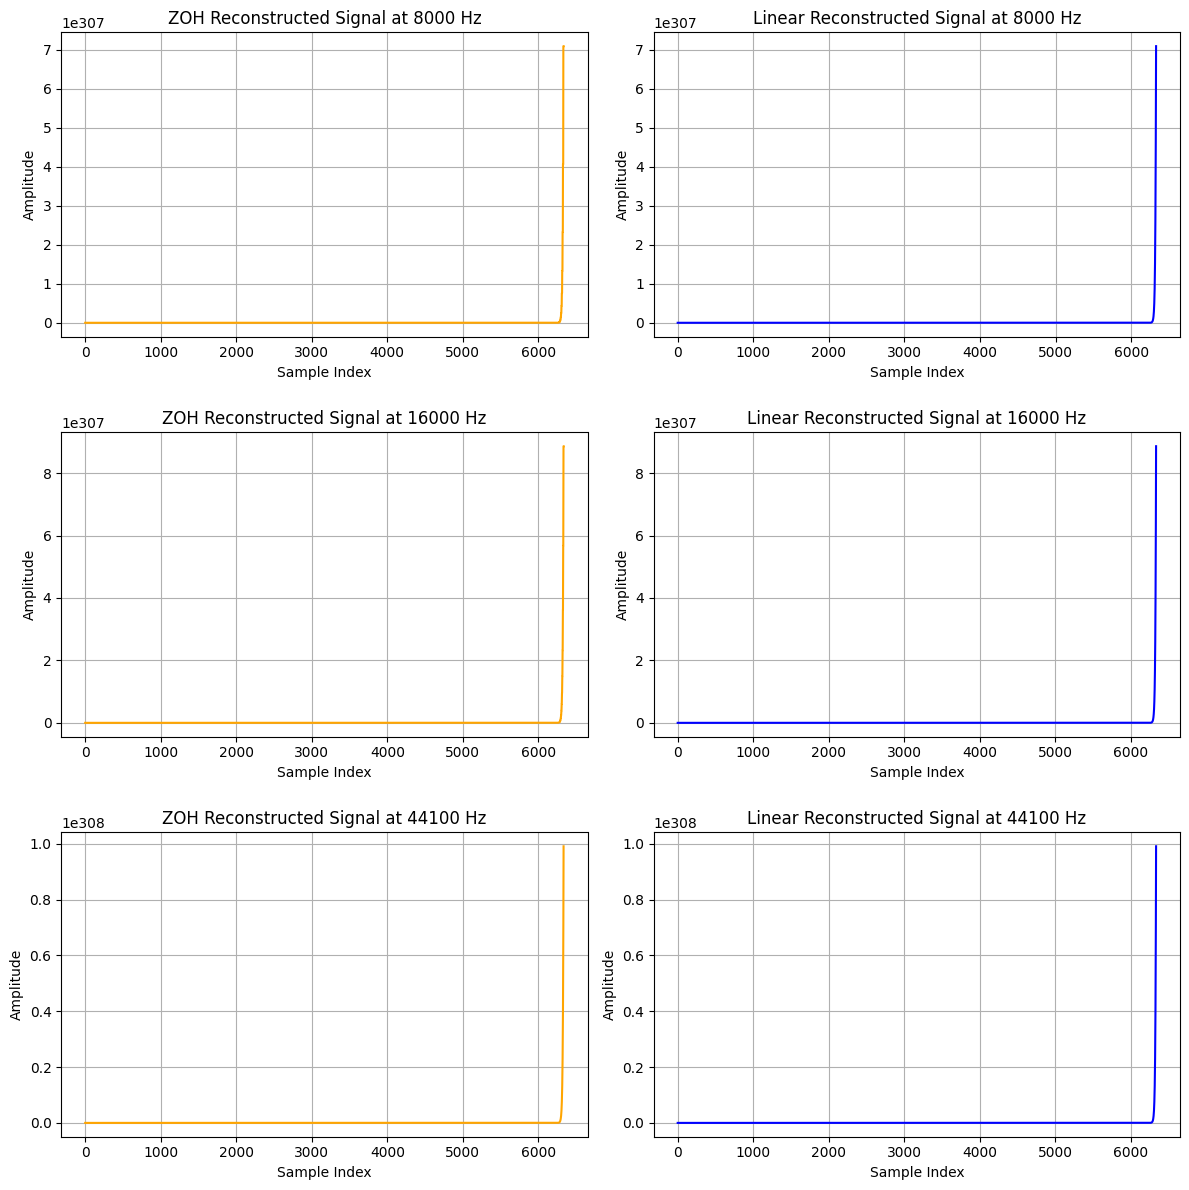

In [259]:
from scipy import interpolate

# (d) Interpolation functions
def zero_order_hold(signal, factor):
    return np.repeat(signal, factor)

def linear_interpolation(signal, factor):
    x = np.arange(len(signal))
    x_new = np.arange(0, len(signal) - 1, 1 / factor)
    return np.interp(x_new, x, signal)

# Reconstruct the signals
reconstructed_signals = {}
for sr in sampling_rates:
    factor = fs // sr
    downsampled_signal = downsampled_signals[sr]
    
    # Zero-Order Hold
    zoh_signal = zero_order_hold(downsampled_signal, factor)[:len(speech_signal)]
    reconstructed_signals[f'ZOH_{sr}'] = zoh_signal
    
    # Linear Interpolation
    linear_signal = linear_interpolation(downsampled_signal, factor)[:len(speech_signal)]
    reconstructed_signals[f'Linear_{sr}'] = linear_signal

# Plotting reconstructed signals
plt.figure(figsize=(12, 12))
for i, sr in enumerate(sampling_rates):
    plt.subplot(len(sampling_rates), 2, 2 * i + 1)
    plt.plot(reconstructed_signals[f'ZOH_{sr}'], label='ZOH Signal', color='orange')
    plt.title(f'ZOH Reconstructed Signal at {sr} Hz')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid()
    
    plt.subplot(len(sampling_rates), 2, 2 * i + 2)
    plt.plot(reconstructed_signals[f'Linear_{sr}'], label='Linear Signal', color='blue')
    plt.title(f'Linear Reconstructed Signal at {sr} Hz')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.grid()

plt.tight_layout()
plt.show()


In [260]:
# (e) Mean Squared Error Function
def mean_squared_error(original, reconstructed):
    min_length = min(len(original), len(reconstructed))
    return np.mean((original[:min_length] - reconstructed[:min_length]) ** 2)

# Compute MSE for each downsampled signal using both interpolation methods
mse_results = {}
for sr in sampling_rates:
    downsampled_signal = downsampled_signals[sr]
    
    # Zero-Order Hold MSE
    mse_zoh = mean_squared_error(speech_signal, reconstructed_signals[f'ZOH_{sr}'])
    mse_results[f'MSE_ZOH_{sr}'] = mse_zoh
    
    # Linear Interpolation MSE
    mse_linear = mean_squared_error(speech_signal, reconstructed_signals[f'Linear_{sr}'])
    mse_results[f'MSE_Linear_{sr}'] = mse_linear

# Print MSE results
for key, value in mse_results.items():
    print(f"{key}: {value:.6f}")


MSE_ZOH_8000: nan
MSE_Linear_8000: nan
MSE_ZOH_16000: nan
MSE_Linear_16000: nan
MSE_ZOH_44100: nan
MSE_Linear_44100: nan


C:\Users\John Justine\AppData\Local\Temp\ipykernel_57768\764262438.py:4: RuntimeWarning: invalid value encountered in subtract
  return np.mean((original[:min_length] - reconstructed[:min_length]) ** 2)
C:\Users\John Justine\AppData\Local\Temp\ipykernel_57768\764262438.py:4: RuntimeWarning: overflow encountered in square
  return np.mean((original[:min_length] - reconstructed[:min_length]) ** 2)


### Inference
In this section, I focused on generating synthetic speech signals using a glottal pulse and all-pole filtering, illustrating the importance of vocal tract modeling. I explored the effects of downsampling on speech signals, recognizing how sampling rates impact the quality and fidelity of the audio.

I applied reconstruction techniques, including ZOH and Linear Interpolation, to the downsampled signals, reinforcing the significance of choosing appropriate methods for signal recovery. By evaluating the reconstruction performance using MSE across different sampling rates, I emphasized the necessity of rigorous testing to ensure high-quality audio output.

Here we have no mse or nan values because the synthetic values were simple enough to be easily reconstructed by the interpolation methods.